# Pneumonia_Classification
- In this project we will do the `Puenumonia Classification` for both `TensorFlow` and `pytorch`

# TensorFlow

# Download Data

In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:13<00:00, 136MB/s]
100% 2.29G/2.29G [00:13<00:00, 185MB/s]


# Update the packages

In [ ]:
!pip install --upgrade tensorflow torch matplotlib

In [2]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# Import Packages

In [3]:
import shutil
shutil.rmtree('/content/chest_xray/__MACOSX')
shutil.rmtree('/content/chest_xray/chest_xray')
# shutil.rmtree('/content/chest_xray')

In [4]:
try:
    import tensorflow as tf
    from tensorflow.keras import models, layers
    import matplotlib.pyplot as plt
    from PIL import Image
    import numpy as np
    import cv2
    import os
    import random
except Exception as e:
    print(e)

# Data Preprocessing
* **Following step we can done in my data preprocessing steps**
    - Data Cleaning(Remove corrupt images)
    - Data Visulization.
    - Resize and Normilize the image.

# Data Cleaning

In [5]:
def remove_corrupt_images(path):
    """
    This fun is responsible for remove the corrupt images.
    """
    try:
        images=os.listdir(path)
        for img in images:
            if img.lower().endswith(('.jpg', '.jpeg', '.png')):
                # print(img)
                # Try to open the image to check if it's valid
                try:
                    img_file = Image.open(os.path.join(path,img))
                    img_file.verify()

                except (IOError, SyntaxError) as e:
                    print(f"Removing corrupt image: {img}")
                    os.remove(os.path.join(path,img))
            else:
                print(f"Removing non-image file: {img}")
                os.remove(os.path.join(path,img))
        print("Data Cleaning Successfully")
    except Exception as e:
        print(f"Error during image cleaning: {str(e)}")

In [6]:
# Train Normal
print("Cleaning Train Normal")
remove_corrupt_images("/content/chest_xray/train/NORMAL")

print("Cleaning Train Phenomenia")
remove_corrupt_images("/content/chest_xray/train/PNEUMONIA")

print("Cleaning Test Normal")
remove_corrupt_images("/content/chest_xray/test/NORMAL")

print("Cleaning Test Phenomenia")
remove_corrupt_images("/content/chest_xray/test/PNEUMONIA")

print("Cleaning Val Normal")
remove_corrupt_images("/content/chest_xray/val/NORMAL")

print("Cleaning Val  Phenomenia")
remove_corrupt_images("/content/chest_xray/val/PNEUMONIA")

Cleaning Train Normal
Data Cleaning Successfully
Cleaning Train Phenomenia
Data Cleaning Successfully
Cleaning Test Normal
Data Cleaning Successfully
Cleaning Test Phenomenia
Data Cleaning Successfully
Cleaning Val Normal
Data Cleaning Successfully
Cleaning Val  Phenomenia
Data Cleaning Successfully


# Observation
- There is no corrupt images in our data.
- If any image is found corrupt our function will automatically remove them.

# Exploratory Data Analysis
- We see the distrubution of data.

In [7]:
def data_visualization(path):
    """
    This fun is responsible for data visualization.
    """
    try:
        pass
    except Exception as e:
        print(f"Error during image cleaning: {str(e)}")

In [8]:
data_dist={
    "Normal":len(os.listdir("/content/chest_xray/train/NORMAL")),
    "Pneumonia":len(os.listdir('/content/chest_xray/train/PNEUMONIA'))
}
data_dist

{'Normal': 1341, 'Pneumonia': 3875}

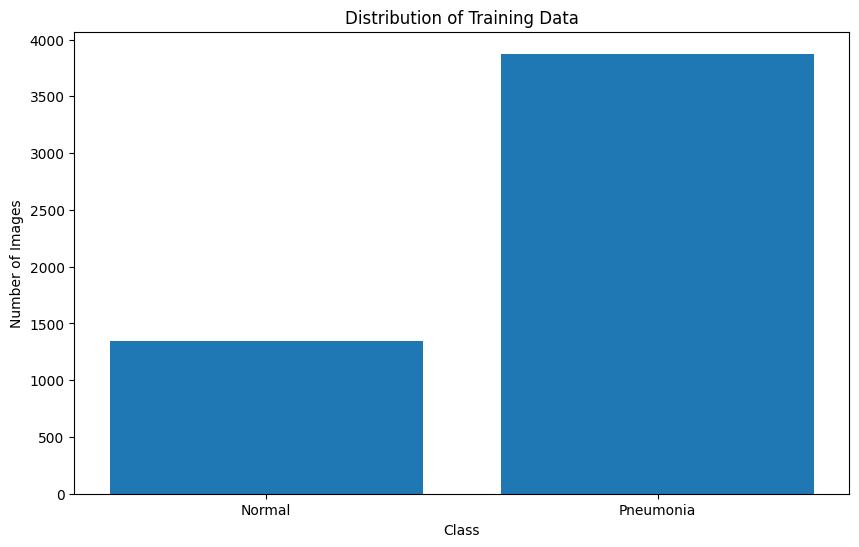

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(data_dist.keys(), data_dist.values())
plt.title("Distribution of Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Observation
- We see that our data is completly `Imbalcnce`.
- `Normal` image = `1341`
- `Phenomenia` Images = `3875`

* **we can handle the imbalce data using `Data Augmentation`**

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
# Train Generator
train_datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

# Test Generator
test_datagen=ImageDataGenerator(rescale=1./255)

train_datagen, test_datagen

(<keras.src.preprocessing.image.ImageDataGenerator at 0x7e45c51cd390>,
 <keras.src.preprocessing.image.ImageDataGenerator at 0x7e45c51cdb10>)

In [ ]:
batch_size=32

# Train Generator
train_generator=train_datagen.flow_from_directory(
    "/content/chest_xray/train",
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary'
)

# Test Generator
test_generator=test_datagen.flow_from_directory(
    "/content/chest_xray/test",
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Check out the class indices
print(train_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


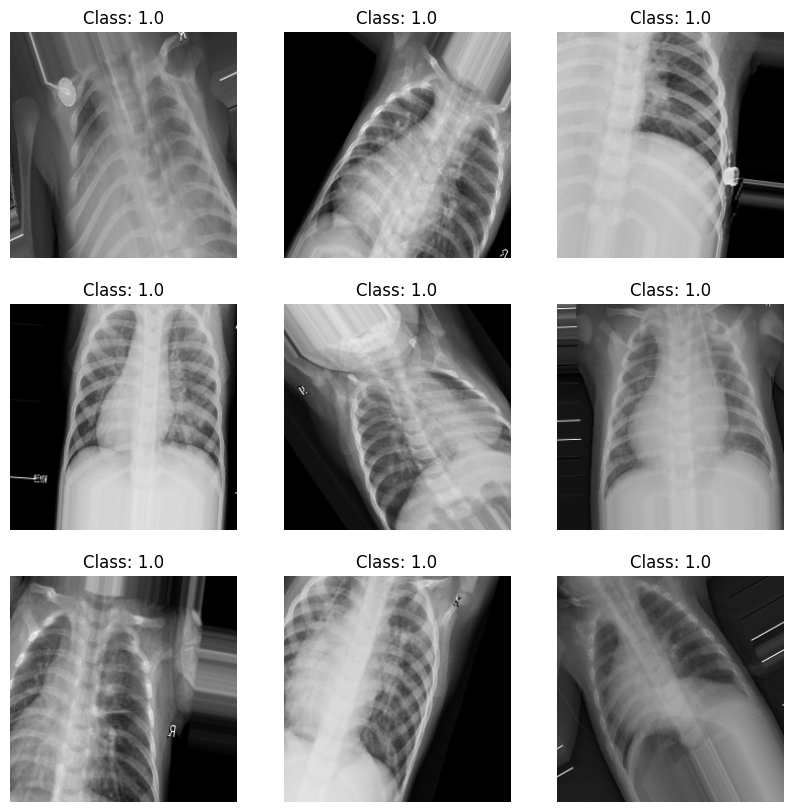

In [ ]:
# Get a batch of augmented images from the train generator
x_batch, y_batch = next(train_generator)

# Display the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Class: {y_batch[i]}")
    plt.axis('off')
plt.show()


# Model Building
- We can utilize the pretrain model like `VGG` , `Resnet` and some other.

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50

In [ ]:
# Load the base model
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
# checkout the model summary again
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Now Build our model
model=models.Sequential()

# Add the base model
model.add(base_model)

# add the flatten layer
model.add(layers.Flatten())

# Add a dence layers
model.add(layers.Dense(256,activation="relu"))

# add a fully connected layer
model.add(layers.Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# Early Stoping and Model Checkpoint

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath='tensor_flowmodel/best_model.keras',  # Filepath to save the best model
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the model with the best validation loss
    save_weights_only=False,  # Save the full model (architecture + weights)
    verbose=1  # Print a message when saving the model
)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with EarlyStopping and ModelCheckpoint
history = model.fit(
    train_generator,
    validation_data=test_generator,
    batch_size=batch_size,
    verbose=1,
    epochs=20,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/20
163/163 [==============================] - ETA: 0s - loss: 0.2836 - accuracy: 0.8982
Epoch 1: val_loss improved from inf to 0.36328, saving model to tensor_flowmodel/best_model.keras
163/163 [==============================] - 152s 926ms/step - loss: 0.2836 - accuracy: 0.8982 - val_loss: 0.3633 - val_accuracy: 0.8574
Epoch 2/20
163/163 [==============================] - ETA: 0s - loss: 0.2076 - accuracy: 0.9201
Epoch 2: val_loss improved from 0.36328 to 0.26744, saving model to tensor_flowmodel/best_model.keras
163/163 [==============================] - 151s 927ms/step - loss: 0.2076 - accuracy: 0.9201 - val_loss: 0.2674 - val_accuracy: 0.8846
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.1762 - accuracy: 0.9247
Epoch 3: val_loss did not improve from 0.26744
163/163 [==============================] - 150s 920ms/step - loss: 0.1762 - accuracy: 0.9247 - val_loss: 0.4457 - val_accuracy: 0.8734
Epoch 4/20
163/163 [==============================] - ETA: 0

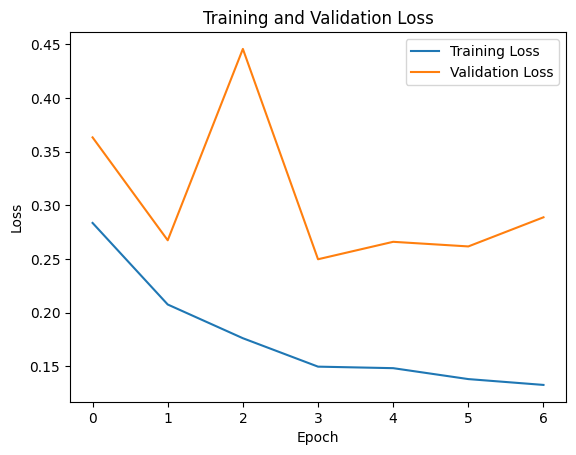

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

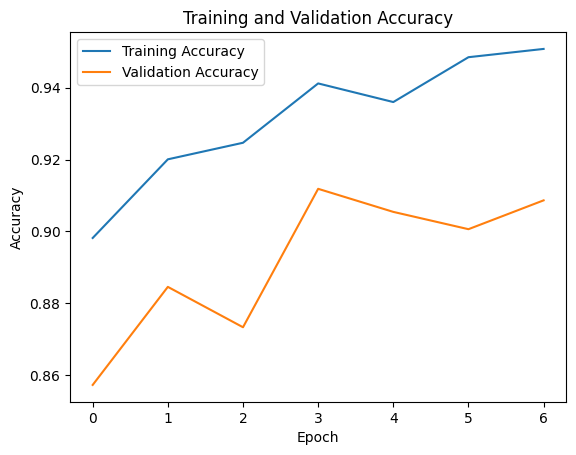

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Evulation

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Get the true labels from the test generator
y_true = test_generator.classes  # Actual labels from the test set

# Make predictions (probabilities)
y_pred_prob = model.predict(test_generator)  # Predictions (as probabilities)

# Convert probabilities to binary (0 or 1) for confusion matrix
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold at 0.5 to get 0 or 1

20/20 [==============================] - 12s 582ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def evaluate_model(y_true, y_pred):
    """
    This fun is responsible for evaluate the model.
    """
    try:
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Print evaluation metrics
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
    except Exception as e:
        print(f"Error during model evaluation: {str(e)}")

In [ ]:
evaluate_model(y_true,y_pred)

Accuracy: 0.5432692307692307
Precision: 0.6296296296296297
Recall: 0.6538461538461539
F1 Score: 0.6415094339622641


In [ ]:
# Confussion matric
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 84, 150],
       [135, 255]])

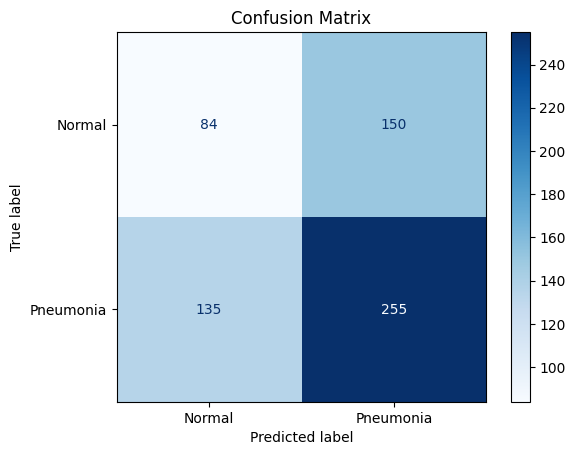

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Model Testing

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('/content/tensor_flowmodel/best_model.keras')


# Path to the new image
new_image_path = '/content/x_ray.jpeg'

# Load and preprocess the new image
img = image.load_img(new_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale the image

# Make prediction
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0][0] > 0.5:
  print("Prediction: Pneumonia")
else:
  print("Prediction: Normal")


1/1 [==============================] - 0s 193ms/step
Prediction: Pneumonia


In [ ]:
# normal=[]
# phe=[]
# images=os.listdir('/content/chest_xray/val/PNEUMONIA')
# for img in images:
#     # Path to the new image
#     new_image_path = f'/content/chest_xray/val/PNEUMONIA/{img}'

#     # Load and preprocess the new image
#     img = image.load_img(new_image_path,target_size=(224, 224))
#     # Load and preprocess the new image
#     img = image.load_img(new_image_path, target_size=(224, 224))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.  # Rescale the image

#     # Make prediction
#     prediction = model.predict(img_array)

#     # Interpret the prediction
#     if prediction[0][0] > 0.5:
#         phe.append("Phenomenia")
#     else:
#         normal.append("normal")

1/1 [==============================] - 0s 75ms/step


# Observation
- We can train the model successfully using `Tensorflow`.
- Model give best result now our goal is to convert the model in `pytorch`

# Pytorch
- In this stage we will convert the above model to `pytorch`.
- My love `Pytorch`

# Step we can do
- Apply Data Augmentation
- Data Loader
- Load the Pretrain model
- Build a top layer
- Train the model

# Import Packages
# Train Generator
```python
train_datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

# Test Generator
test_datagen=ImageDataGenerator(rescale=1./255)

train_datagen, test_datagen
```

In [10]:
import torch
from torch import nn
from torchvision import  transforms,datasets

In [11]:
# Train Datagen
train_datagen = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.RandomRotation(degrees=40),  # Randomly rotate images within 40 degrees
    transforms.RandomHorizontalFlip(p=0.5),  # Flip the image horizontally with a probability of 0.5
    transforms.RandomResizedCrop(224),  # Randomly crop and resize images to 224x224
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Apply random brightness, contrast, etc.
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Normalize based on ImageNet stats
])


# Test Datagen
test_datagen = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Normalize based on ImageNet stats
])


# Apply the tranformation during loading the dataset

In [12]:
# Train data
train_dataset=datasets.ImageFolder(
    root="/content/chest_xray/train",
    transform=train_datagen
)

# Test Data
test_dataset=datasets.ImageFolder(
    root="/content/chest_xray/test",
    transform=test_datagen
)

train_dataset,test_dataset

(Dataset ImageFolder
     Number of datapoints: 5216
     Root location: /content/chest_xray/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomRotation(degrees=[-40.0, 40.0], interpolation=nearest, expand=False, fill=0)
                RandomHorizontalFlip(p=0.5)
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.2, 0.2))
                ToTensor()
                Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
            ),
 Dataset ImageFolder
     Number of datapoints: 624
     Root location: /content/chest_xray/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                

# Data Loader
- Data Loader is responsible for loading the data efficently

In [13]:
from torch.utils.data import DataLoader

In [41]:
# Train dataloader
train_data_loader=DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

# Test DataLoader
test_data_loader=DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

train_data_loader,test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7ee8129bea10>,
 <torch.utils.data.dataloader.DataLoader at 0x7ee8129bece0>)

# Load the pretrain model

In [42]:
import torchvision.models as models

In [43]:
# Load the model
base_model= models.mobilenet_v2(pretrained=True)

base_model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [44]:
# Freeze all the layer except classifier layre
for param in base_model.parameters():
    param.requires_grad=False

In [45]:
# Chaneg the last layers
base_model.classifier=nn.Sequential(
    nn.Linear(1280, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 2)
)
base_model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [46]:
# Define the loss fun
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer=torch.optim.Adam(base_model.parameters(),lr=0.001,weight_decay=0.01)

In [47]:
# Set the model device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)

In [48]:
# Model Training

In [49]:
from tqdm import tqdm

In [34]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

In [50]:
num_epochs = 2

for epoch in range(num_epochs):
    base_model.train()  # Ensure the model is in training mode
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    # Training Loop
    for feature, label in tqdm(train_data_loader):
        feature = feature.to(device)
        label = label.to(device)

        # Forward pass
        output = base_model(feature)

        # Calculate the loss
        loss = loss_fn(output, label)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Update the running loss
        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

    # Evaluation Mode
    base_model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    test_correct = 0
    test_total = 0

    with torch.no_grad():  # No need for gradients during evaluation
        for images, labels in test_data_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = base_model(images)
            loss = loss_fn(outputs, labels)

            # Update the running loss
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()


    # Calculate average loss and accuracy
    train_average_loss = train_loss / len(train_data_loader)
    test_average_loss = test_loss / len(test_data_loader)
    train_accuracy = train_correct / train_total
    test_accuracy = test_correct / test_total

    if epoch%2==0:
      save_checkpoint({
          "state_dict":base_model.state_dict(),
          "optimizer":optimizer.state_dict(),
          "epoch":epoch
      })

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_average_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_average_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

100%|██████████| 82/82 [09:18<00:00,  6.81s/it]


=> Saving checkpoint
Epoch [1/2], Train Loss: 0.2952, Train Accuracy: 0.8744, Test Loss: 0.8785, Test Accuracy: 0.6843


100%|██████████| 82/82 [09:10<00:00,  6.72s/it]


Epoch [2/2], Train Loss: 0.2692, Train Accuracy: 0.8831, Test Loss: 0.3625, Test Accuracy: 0.8429


In [60]:
# Load the saved PyTorch model
model = models.mobilenet_v2(pretrained=True)  # Create a MobileNetV2 model

model.classifier = nn.Sequential(
    nn.Linear(1280, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 2)
)  # Replace the last layer

# Load the checkpoint
checkpoint = torch.load('/content/my_checkpoint.pth.tar')
model.load_state_dict(checkpoint['state_dict'])  # Load the saved weights
model.eval()  # Set the model to evaluation mode

# Path to the new image
# new_image_paths = os.lisd

# Load and preprocess the new image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
img = Image.open(new_image_path).convert('RGB')  # Ensure it's RGB
img_tensor = transform(img).unsqueeze(0)  # Add a batch dimension

# Make prediction
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to device
img_tensor = img_tensor.to(device)  # Move input tensor to device

with torch.no_grad():
    output = model(img_tensor)  # Forward pass
    _, predicted = torch.max(output.data, 1)

# Interpret the prediction
if predicted.item() == 1:
    print("Prediction: Pneumonia")
    print(output)
else:
    print("Prediction: Normal")

Prediction: Pneumonia
tensor([[-1.0456,  2.0313]])


<ipython-input-60-c65d893a3148>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/content/my_checkpoint.pth.tar')


In [77]:
import os

images=os.listdir('/content/chest_xray/test/NORMAL')
counter=0
normal=[]
phe=[]
for img in images:
    final_img=os.path.join('/content/chest_xray/test/NORMAL',img)
    print(final_img)

    # Load and preprocess the new image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    img = Image.open(final_img).convert('RGB')  # Ensure it's RGB
    img_tensor = transform(img).unsqueeze(0)  # Add a batch dimension

    # Make prediction
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)  # Move model to device
    img_tensor = img_tensor.to(device)  # Move input tensor to device

    with torch.no_grad():
        output = model(img_tensor)  # Forward pass
        _, predicted = torch.max(output.data, 1)

    # Interpret the prediction
    if predicted.item() == 1:
        print("Prediction: Pneumonia")
        print(output)
        phe.append("Phenomenia")
    else:
        print("Prediction: Normal")
        normal.append("Normal")


/content/chest_xray/test/NORMAL/NORMAL2-IM-0326-0001.jpeg
Prediction: Pneumonia
tensor([[-0.3689,  1.7525]])
/content/chest_xray/test/NORMAL/NORMAL2-IM-0279-0001.jpeg
Prediction: Pneumonia
tensor([[0.0567, 1.3604]])
/content/chest_xray/test/NORMAL/NORMAL2-IM-0351-0001.jpeg
Prediction: Pneumonia
tensor([[0.4020, 1.1814]])
/content/chest_xray/test/NORMAL/NORMAL2-IM-0117-0001.jpeg
Prediction: Pneumonia
tensor([[-1.5171,  2.3689]])
/content/chest_xray/test/NORMAL/NORMAL2-IM-0341-0001.jpeg
Prediction: Pneumonia
tensor([[0.5811, 0.8716]])
/content/chest_xray/test/NORMAL/NORMAL2-IM-0210-0001.jpeg
Prediction: Pneumonia
tensor([[-3.1900,  3.4815]])
/content/chest_xray/test/NORMAL/IM-0063-0001.jpeg
Prediction: Normal
/content/chest_xray/test/NORMAL/NORMAL2-IM-0321-0001.jpeg
Prediction: Pneumonia
tensor([[-0.4981,  1.3092]])
/content/chest_xray/test/NORMAL/NORMAL2-IM-0035-0001.jpeg
Prediction: Pneumonia
tensor([[-1.0271,  2.3390]])
/content/chest_xray/test/NORMAL/NORMAL2-IM-0251-0001.jpeg
Predict

In [78]:
len(normal)/len(phe)

0.19387755102040816